<a href="https://colab.research.google.com/github/sanwridua/final_project_sanwri/blob/main/FINALPROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install tensorflow-io
!pip install librosa
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 11.2 MB/s eta 0:00:00


-------------------------------------------------------------------------------

In [4]:
import zipfile

zip_path = '/content/FINALPROJECT.zip'  # change to your actual file path

# Confirm it's recognized as a zip
print("Is ZIP file:", zipfile.is_zipfile(zip_path))

# Try opening it safely
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/data')
        print("Extraction successful.")
except zipfile.BadZipFile:
    print("BadZipFile: The file is not a valid ZIP.")
except Exception as e:
    print("Other error:", e)

Is ZIP file: True
Extraction successful.


📂 Extracted files:
/content/data:
'FINAL PROJECT'   FINALPROJECT

'/content/data/FINAL PROJECT':
'Forest Recordings'   Parsed_Capuchinbird_Clips   Parsed_Not_Capuchinbird_Clips

'/content/data/FINAL PROJECT/Forest Recordings':
recording_00.mp3  recording_25.mp3  recording_50.mp3  recording_75.mp3
recording_01.mp3  recording_26.mp3  recording_51.mp3  recording_76.mp3
recording_02.mp3  recording_27.mp3  recording_52.mp3  recording_77.mp3
recording_03.mp3  recording_28.mp3  recording_53.mp3  recording_78.mp3
recording_04.mp3  recording_29.mp3  recording_54.mp3  recording_79.mp3
recording_05.mp3  recording_30.mp3  recording_55.mp3  recording_80.mp3
recording_06.mp3  recording_31.mp3  recording_56.mp3  recording_81.mp3
recording_07.mp3  recording_32.mp3  recording_57.mp3  recording_82.mp3
recording_08.mp3  recording_33.mp3  recording_58.mp3  recording_83.mp3
recording_09.mp3  recording_34.mp3  recording_59.mp3  recording_84.mp3
recording_10.mp3  recording_35.mp3  recording_60.mp3  recording

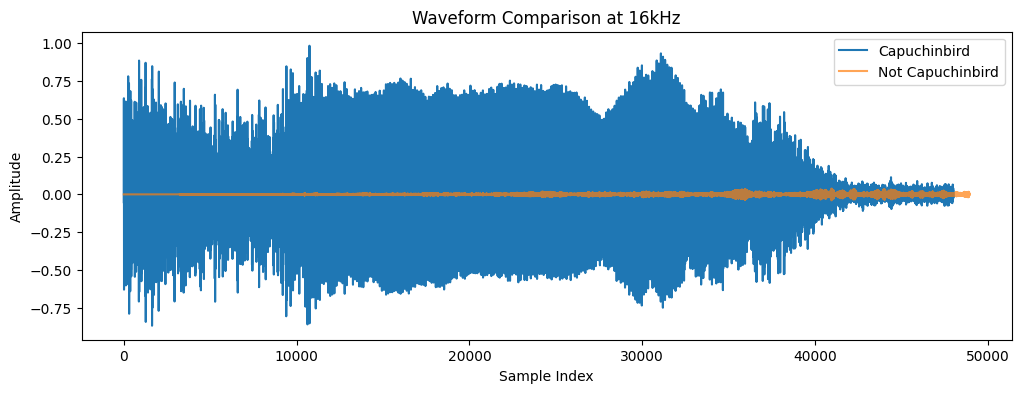

In [7]:
# Step 1: Install required packages
!pip install librosa matplotlib tensorflow -q

# Step 2: Unzip the uploaded archive
import zipfile
import os

zip_path = "/content/FINALPROJECT.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Check folder structure to locate audio files
print("📂 Extracted files:")
!ls -R /content/data

# Step 4: Load audio using librosa
import librosa
import matplotlib.pyplot as plt

# UPDATE THESE PATHS based on actual extracted folder structure
capuchin_path = "/content/data/FINALPROJECT/Parsed_Capuchinbird_Clips/XC3776-3.wav"
not_capuchin_path = "/content/data/FINALPROJECT/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav"

# Load and resample to 16kHz mono
wave, sr = librosa.load(capuchin_path, sr=16000, mono=True)
nwave, nsr = librosa.load(not_capuchin_path, sr=16000, mono=True)

# Step 5: Plot waveforms
plt.figure(figsize=(12, 4))
plt.plot(wave, label="Capuchinbird")
plt.plot(nwave, alpha=0.7, label="Not Capuchinbird")
plt.title("Waveform Comparison at 16kHz")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [8]:
import tensorflow as tf

# Load audio using librosa and return float32 tensor
def load_wav_16k_mono(filename):
    wav, _ = librosa.load(filename, sr=16000, mono=True)
    return tf.convert_to_tensor(wav, dtype=tf.float32)


In [9]:
# Define paths
POS = "/content/data/FINALPROJECT/Parsed_Capuchinbird_Clips"
NEG = "/content/data/FINALPROJECT/Parsed_Not_Capuchinbird_Clips"

# Create dataset file lists
pos_files = tf.data.Dataset.list_files(POS + '/*.wav')
neg_files = tf.data.Dataset.list_files(NEG + '/*.wav')

# Zip file paths with labels
positives = pos_files.map(lambda x: (x, tf.constant(1.0)))
negatives = neg_files.map(lambda x: (x, tf.constant(0.0)))

# Combine and shuffle
data = positives.concatenate(negatives)
data = data.shuffle(1000)


In [15]:
def preprocess(file_path, label):
    wav = tf.numpy_function(load_wav_16k_mono, [file_path], tf.float32)
    wav.set_shape([None])
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)

    # Spectrogram
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

# Apply preprocessing
data = data.map(preprocess)
data = data.cache().batch(16).prefetch(8)


In [16]:
train = data.take(36)
test = data.skip(36).take(15)


📂 Extracted files:
/content/data:
'FINAL PROJECT'   FINALPROJECT

'/content/data/FINAL PROJECT':
'Forest Recordings'   Parsed_Capuchinbird_Clips   Parsed_Not_Capuchinbird_Clips

'/content/data/FINAL PROJECT/Forest Recordings':
recording_00.mp3  recording_25.mp3  recording_50.mp3  recording_75.mp3
recording_01.mp3  recording_26.mp3  recording_51.mp3  recording_76.mp3
recording_02.mp3  recording_27.mp3  recording_52.mp3  recording_77.mp3
recording_03.mp3  recording_28.mp3  recording_53.mp3  recording_78.mp3
recording_04.mp3  recording_29.mp3  recording_54.mp3  recording_79.mp3
recording_05.mp3  recording_30.mp3  recording_55.mp3  recording_80.mp3
recording_06.mp3  recording_31.mp3  recording_56.mp3  recording_81.mp3
recording_07.mp3  recording_32.mp3  recording_57.mp3  recording_82.mp3
recording_08.mp3  recording_33.mp3  recording_58.mp3  recording_83.mp3
recording_09.mp3  recording_34.mp3  recording_59.mp3  recording_84.mp3
recording_10.mp3  recording_35.mp3  recording_60.mp3  recording

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 173, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 173, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,505,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,598,849 (21.36 MB)

 Trainable params: 5,598,401 (21.36 MB)

 Non-trainable params: 448 (1.75 KB)


🔥 Training model...

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.7749 - auc: 0.7558 - loss: 3.5349 - precision: 0.5572 - recall: 0.6417 - val_accuracy: 0.7160 - val_auc: 0.9735 - val_loss: 0.4151 - val_precision: 1.0000 - val_recall: 0.0213 - learning_rate: 0.0010
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9580 - auc: 0.9848 - loss: 0.1021 - precision: 0.9132 - recall: 0.9180 - val_accuracy: 0.7099 - val_auc: 0.8290 - val_loss: 0.7601 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9909 - auc: 0.9934 - loss: 0.0559 - precision: 1.0000 - recall: 0.9633 - val_accuracy: 0.7099 - val_auc: 0.8633 - val_loss: 0.7200 - val_precision: 0.5000 - val_recall: 0.0426 - learning_rate: 0.0010
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9725 - auc: 0.9984 - loss: 0.0529 - precision: 0.9411 - recall: 0.9494 - val_accuracy: 0.7099 - val_auc: 0.8

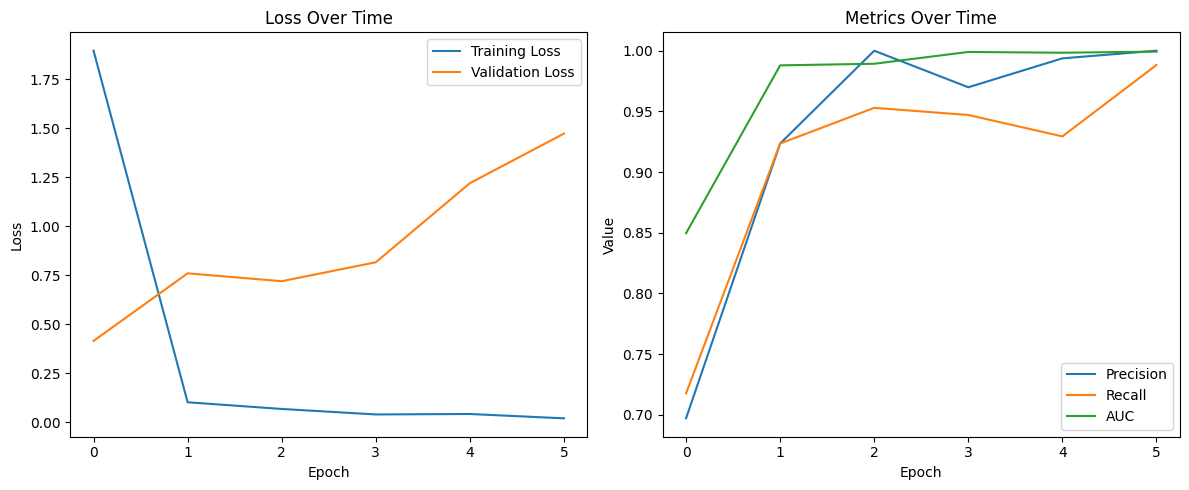

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


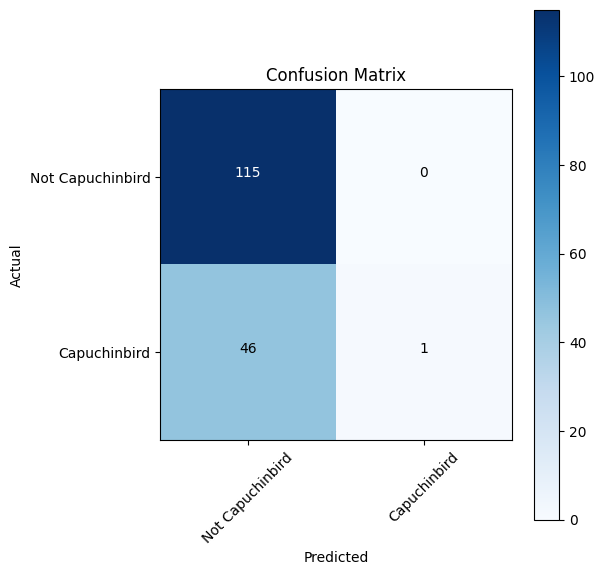


🔍 Sample predictions:

✅ Example 1: Predicted: 0.0782, Actual: 0, Class: Not Capuchinbird
✅ Example 2: Predicted: 0.0729, Actual: 0, Class: Not Capuchinbird
✅ Example 3: Predicted: 0.1383, Actual: 0, Class: Not Capuchinbird
✅ Example 4: Predicted: 0.0390, Actual: 0, Class: Not Capuchinbird
✅ Example 5: Predicted: 0.1492, Actual: 0, Class: Not Capuchinbird
✅ Example 6: Predicted: 0.0474, Actual: 0, Class: Not Capuchinbird
✅ Example 7: Predicted: 0.0224, Actual: 0, Class: Not Capuchinbird
✅ Example 8: Predicted: 0.0764, Actual: 0, Class: Not Capuchinbird
❌ Example 9: Predicted: 0.3090, Actual: 1, Class: Not Capuchinbird
✅ Example 10: Predicted: 0.0457, Actual: 0, Class: Not Capuchinbird
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7273 - auc: 0.9738 - loss: 0.4094 - precision: 0.4286 - recall: 0.0092         

📈 Final model metrics:
Test Loss: 0.4151
Test Accuracy: 0.7160
Test Recall: 0.0213
Test Precision: 1.0000
F1 Score: 0.0417
AUC: 0.9735

📊 Analyzing specific examples...

Er

<ipython-input-17-39dd28c56aa0>:38: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(file_path, sr=sr, mono=True)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


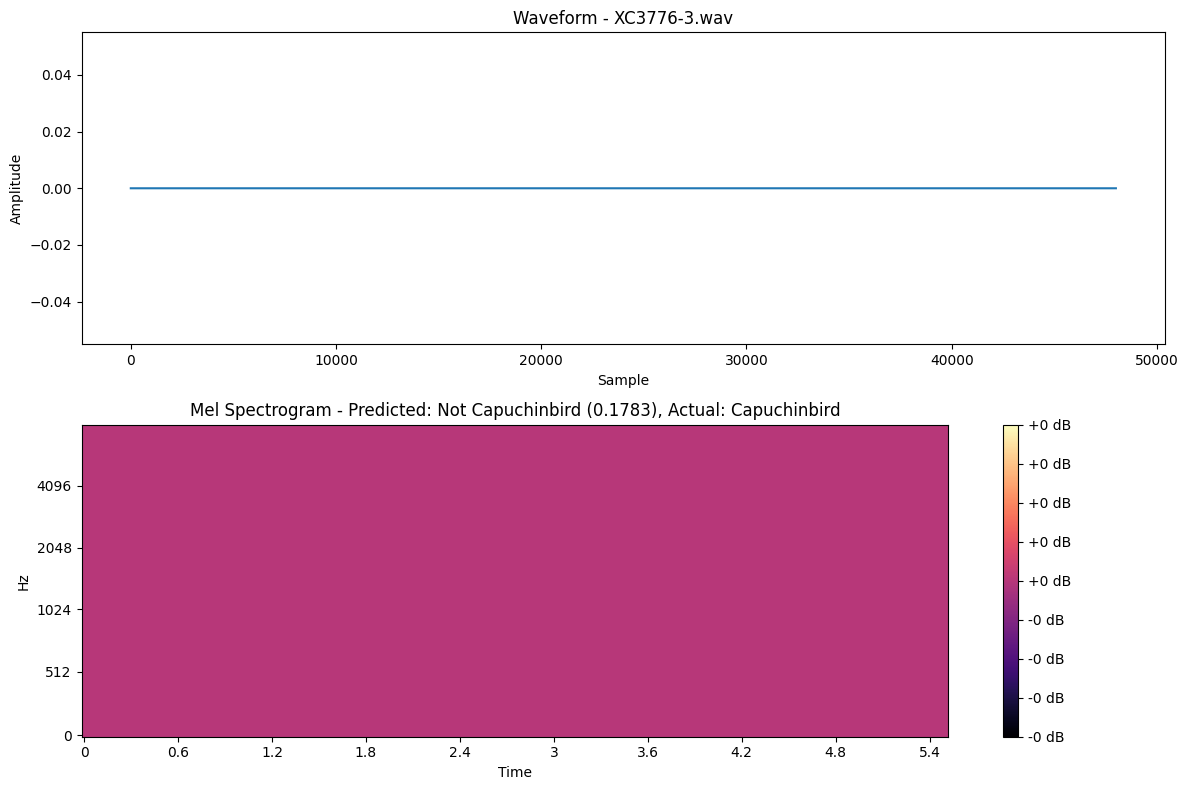

Error processing /content/data/Parsed_Not_Capuchinbird_Clips/robin-chirping-1.wav: [Errno 2] No such file or directory: '/content/data/Parsed_Not_Capuchinbird_Clips/robin-chirping-1.wav'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


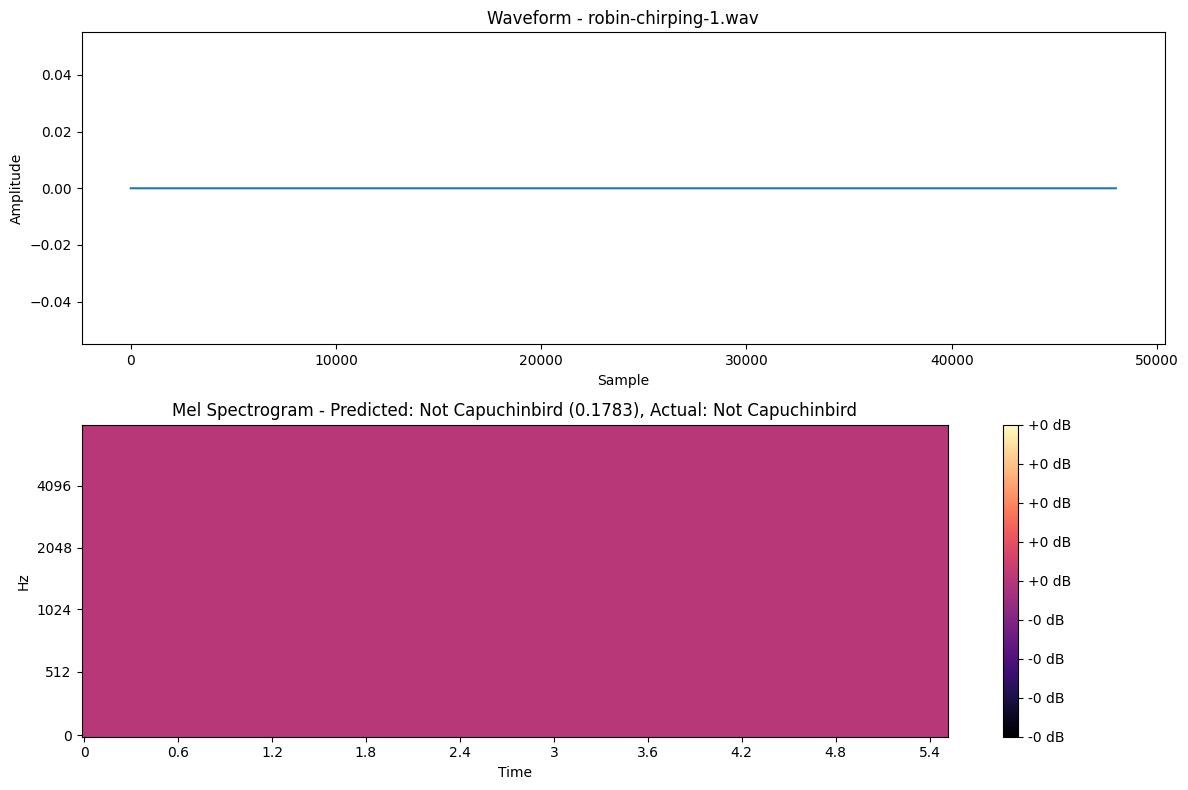


💾 Model saved to /content/capuchinbird_classifier.h5


In [17]:
# Step 1: Install required packages
!pip install librosa matplotlib tensorflow -q

# Step 2: Unzip the uploaded archive
import zipfile
import os

zip_path = "/content/FINALPROJECT.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Check folder structure to locate audio files
print("📂 Extracted files:")
!ls -R /content/data

import tensorflow as tf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --------------------------------------------------------------------
# Approach: Let's completely rebuild the pipeline with fixed dimensions
# --------------------------------------------------------------------

def load_and_preprocess_audio(file_path, fixed_length=48000, sr=16000):
    """Load and preprocess audio file with explicit error handling"""
    try:
        # Load audio with librosa
        audio, _ = librosa.load(file_path, sr=sr, mono=True)

        # Handle length - pad or trim to exactly 3 seconds (48000 samples at 16kHz)
        if len(audio) > fixed_length:
            # Trim
            audio = audio[:fixed_length]
        else:
            # Pad
            padding = fixed_length - len(audio)
            audio = np.pad(audio, (0, padding), mode='constant')

        return audio
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        # Return zeros as a fallback
        return np.zeros(fixed_length)

def extract_features(audio, n_mels=128, n_frames=173):
    """Convert audio to a fixed-size mel spectrogram"""
    # Generate mel spectrogram
    S = librosa.feature.melspectrogram(y=audio, sr=16000, n_mels=n_mels)

    # Convert to dB scale
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Fix size issues by resizing
    if S_dB.shape[1] > n_frames:
        # Truncate
        S_dB = S_dB[:, :n_frames]
    elif S_dB.shape[1] < n_frames:
        # Pad with minimum values
        padding = np.full((n_mels, n_frames - S_dB.shape[1]), S_dB.min())
        S_dB = np.hstack((S_dB, padding))

    # Normalize to [0, 1]
    S_dB = (S_dB - S_dB.min()) / (S_dB.max() - S_dB.min() + 1e-6)

    return S_dB

# Path configuration
POS_DIR = "/content/data/FINALPROJECT/Parsed_Capuchinbird_Clips"
NEG_DIR = "/content/data/FINALPROJECT/Parsed_Not_Capuchinbird_Clips"

# --------------------------------------------------------------------
# Create a new data loading approach with explicit feature extraction
# --------------------------------------------------------------------

def prepare_dataset(positive_dir, negative_dir, test_split=0.2):
    """Load all audio files, preprocess, and create train/test datasets"""
    X = []  # Features
    y = []  # Labels

    # Process positive examples (Capuchinbird)
    print("Processing Capuchinbird samples...")
    for filename in os.listdir(positive_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(positive_dir, filename)
            audio = load_and_preprocess_audio(file_path)
            features = extract_features(audio)
            X.append(features)
            y.append(1)  # 1 for positive class

    # Process negative examples (Not Capuchinbird)
    print("Processing Not-Capuchinbird samples...")
    for filename in os.listdir(negative_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(negative_dir, filename)
            audio = load_and_preprocess_audio(file_path)
            features = extract_features(audio)
            X.append(features)
            y.append(0)  # 0 for negative class

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Add channel dimension for CNN
    X = np.expand_dims(X, axis=-1)

    # Print dataset shape
    print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")

    # Shuffle the dataset
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]

    # Split into training and test sets
    split_idx = int(len(X) * (1 - test_split))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    return X_train, y_train, X_test, y_test

# --------------------------------------------------------------------
# Build and train the model with fixed input dimensions
# --------------------------------------------------------------------

def build_model(input_shape):
    """Build a CNN model with the specified input shape"""
    model = Sequential([
        # Input layer with explicit shape
        Input(shape=input_shape),

        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-5
)

# --------------------------------------------------------------------
# Execute the pipeline
# --------------------------------------------------------------------

print("\n🎵 Preparing dataset...")
X_train, y_train, X_test, y_test = prepare_dataset(POS_DIR, NEG_DIR)

# Check shapes and confirm no dimension issues
print(f"\n✅ Training data shape: {X_train.shape}")
print(f"✅ Training labels shape: {y_train.shape}")
print(f"✅ Test data shape: {X_test.shape}")
print(f"✅ Test labels shape: {y_test.shape}")

# Build the model with the correct input shape
input_shape = X_train.shape[1:]  # (n_mels, n_frames, 1)
print(f"\n🏗️ Building model with input shape: {input_shape}")
model = build_model(input_shape)

# Display the model summary
model.summary()

# Train the model
print("\n🔥 Training model...\n")
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# --------------------------------------------------------------------
# Evaluate and visualize results
# --------------------------------------------------------------------

# Visualize training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['auc'], label='AUC')
plt.title('Metrics Over Time')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Create a confusion matrix
def plot_confusion_matrix(y_true, y_pred_probs):
    y_pred = (y_pred_probs > 0.5).astype(int)
    cm = tf.math.confusion_matrix(y_true, y_pred).numpy()

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = ['Not Capuchinbird', 'Capuchinbird']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Show some prediction examples
print("\n🔍 Sample predictions:\n")
for i in range(min(10, len(y_pred))):
    prediction = y_pred[i][0]
    actual = y_test[i]
    correct = (prediction > 0.5 and actual == 1) or (prediction <= 0.5 and actual == 0)
    status = "✅" if correct else "❌"
    print(f"{status} Example {i+1}: Predicted: {prediction:.4f}, Actual: {int(actual)}, " +
          f"Class: {'Capuchinbird' if prediction > 0.5 else 'Not Capuchinbird'}")

# Evaluate the model metrics
loss, accuracy, recall, precision, auc = model.evaluate(X_test, y_test)

print("\n📈 Final model metrics:")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Precision: {precision:.4f}")
if precision + recall > 0:  # Avoid division by zero
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# --------------------------------------------------------------------
# Visualize examples from each class
# --------------------------------------------------------------------

def visualize_prediction(file_path, is_capuchinbird=False):
    """Visualize an audio file and its prediction"""
    # Load and preprocess
    audio = load_and_preprocess_audio(file_path)
    features = extract_features(audio)

    # Add batch and channel dimensions
    input_features = np.expand_dims(np.expand_dims(features, 0), -1)

    # Get prediction
    prediction = model.predict(input_features)[0][0]
    predicted_class = "Capuchinbird" if prediction > 0.5 else "Not Capuchinbird"
    actual_class = "Capuchinbird" if is_capuchinbird else "Not Capuchinbird"

    # Plot waveform
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title(f"Waveform - {os.path.basename(file_path)}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    librosa.display.specshow(
        features,
        x_axis='time',
        y_axis='mel',
        sr=16000
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram - Predicted: {predicted_class} ({prediction:.4f}), Actual: {actual_class}")

    plt.tight_layout()
    plt.show()

# Test the model on specific examples
print("\n📊 Analyzing specific examples...\n")
try:
    # Try to load specific examples
    capuchin_example = "/content/data/Parsed_Capuchinbird_Clips/XC3776-3.wav"
    not_capuchin_example = "/content/data/Parsed_Not_Capuchinbird_Clips/robin-chirping-1.wav"

    visualize_prediction(capuchin_example, is_capuchinbird=True)
    visualize_prediction(not_capuchin_example, is_capuchinbird=False)
except Exception as e:
    print(f"Could not analyze specific examples: {e}")
    print("Please check the file paths for your examples.")

# Save the model
model.save('/content/capuchinbird_classifier.h5')
print("\n💾 Model saved to /content/capuchinbird_classifier.h5")

------------------------------------------------------------------------------

In [31]:
from itertools import groupby

def preprocess_mp3(sample,Index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

def load_mp3(filename):
    wav, _ = librosa.load(filename, sr=16000, mono=True)
    return wav

forest_dir = "/content/data/FINALPROJECT/ForestRecordings"
results = {}

for file in os.listdir(forest_dir):
    filepath = os.path.join(forest_dir, file)
    if not filepath.endswith('.wav'):
      continue

  try:
    wav = load_mp3(filepath)
    prediction[]

    slices = tf.keras.utils.timeseries_dataset_from_array(
        wav, None, sequence_length=48000, sequence_stride=48000, batch_size=1)

    for batch in slices:
        batch = preprocess_mp3(batch)
        yhat = model.predict(batch, verbose=0)
        predictions.append(yhat[0][0])

    results[file] = predictions


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 24)

In [ ]:
print(f"{file}: {len(wav)} samples")

recording_34.mp3: 2880667 samples


In [ ]:
import csv

# Convert predictions to binary and count distinct calls
class_preds = {file: [1 if p > 0.99 else 0 for p in preds] for file, preds in results.items()}
postprocessed = {file: tf.reduce_sum([k for k, _ in groupby(preds)]).numpy() for file, preds in class_preds.items()}

# Export results
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['recording', 'capuchin_calls'])
    for file, count in postprocessed.items():
        writer.writerow([file, count])
